In [1]:
import sys
import numpy as np
import os
sys.path.append(os.path.expanduser("~/git/machine_learning/src"))
import importlib
import models
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf

2023-09-01 22:10:10.135264: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-01 22:10:10.172686: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data_dir = os.path.expanduser("~m2d/git/analysis_playground/ml/data/training_data")

pars = np.load(os.path.join(data_dir, "orhs1-pars_pars.npy"))
refl = np.load(os.path.join(data_dir, "orhs1-pars_data.npy"))
#q_values = np.load(os.path.join(data_dir, "orhs1_q_values.npy"))

print(pars.shape)
print(refl.shape)
#print(q_values.shape)

idx = 0
nset=10000

(2000000, 4)
(2000000, 100)


In [3]:
testset= np.asarray(refl[-nset:])
testsetout= np.asarray(pars[-nset:])
testpars = np.asarray (pars[-nset:])

In [4]:
import importlib
importlib.reload(models)
n_data = refl.shape[0]
n_features = refl.shape[1]
n_outputs = 4

encoder=models.cnn_encoder(n_data, n_features, n_outputs)
encoder.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam())
history = encoder.fit(refl, pars,
                        epochs=20, batch_size=1028,
                        validation_data=(testset, testsetout))
data_dir = os.path.expanduser("~/git/machine_learning/data")
models.save_model(encoder, "cnn1layer", data_dir)

Epoch 1/20
1946/1946 [==============================] - 21s 11ms/step - loss: 0.0629 - val_loss: 0.0398
Epoch 2/20
1946/1946 [==============================] - 20s 10ms/step - loss: 0.0327 - val_loss: 0.0281
Epoch 3/20
1946/1946 [==============================] - 20s 10ms/step - loss: 0.0323 - val_loss: 0.0275
Epoch 4/20
1946/1946 [==============================] - 20s 10ms/step - loss: 0.0238 - val_loss: 0.0218
Epoch 5/20
1946/1946 [==============================] - 20s 10ms/step - loss: 0.0210 - val_loss: 0.0183
Epoch 6/20
1946/1946 [==============================] - 20s 10ms/step - loss: 0.0186 - val_loss: 0.0185
Epoch 7/20
1946/1946 [==============================] - 20s 10ms/step - loss: 0.0171 - val_loss: 0.0164
Epoch 8/20
1946/1946 [==============================] - 20s 10ms/step - loss: 0.0157 - val_loss: 0.0167
Epoch 9/20
1946/1946 [==============================] - 20s 10ms/step - loss: 0.0144 - val_loss: 0.0141
Epoch 10/20
1946/1946 [==============================] - 20s 10m

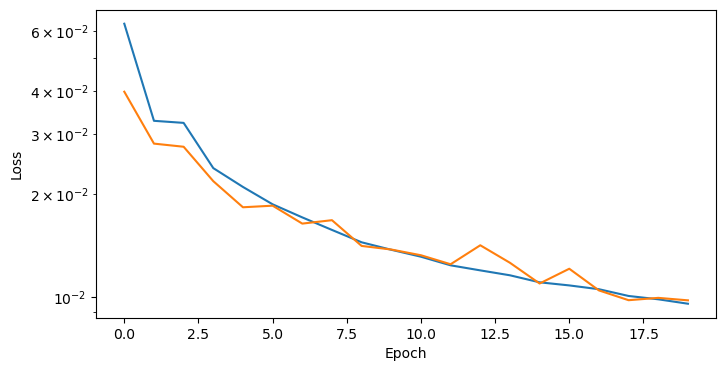

In [7]:
fig = plt.figure(dpi=100, figsize=[8,4])

plt.plot(np.arange(len(history.history['loss'])), history.history['loss'], label='loss')
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.xscale('linear')
plt.show()

In [8]:
importlib.reload(models)
data_dir = os.path.expanduser("~/git/machine_learning/src/settings.json")

In [9]:
importlib.reload(models)
data_dir = os.path.expanduser("~/git/machine_learning/data")

In [10]:
model=models.load_model("cnn1layer", data_dir)
idx=0

In [11]:
pars=encoder.predict(testset)


313/313 [==============================] - 1s 2ms/step


In [12]:
print (testset.shape)

(10000, 100)


In [14]:
preds=model.predict(refl[:10000])

313/313 [==============================] - 1s 2ms/step


In [15]:
idx=0

In [47]:
print (pars[idx])
print(testsetout[idx])
difference=pars[idx]-testsetout[idx]
print(difference)
idx+=1

[-0.78259265 -0.80112046 -0.06010167 -0.08563331]
[-0.775768   -0.76873759 -0.1405078  -0.13828736]
[-0.00682465 -0.03238287  0.08040613  0.05265405]


(10000, 4)


IndexError: index 4 is out of bounds for axis 1 with size 4

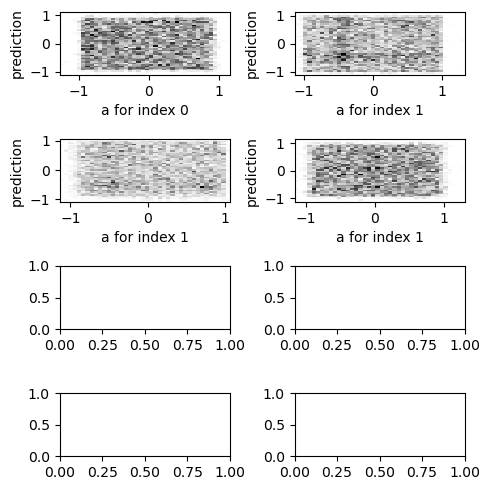

In [43]:
n_bins=40
print(pars.shape)
fig, axs= plt.subplots(4,2, sharey=False, tight_layout= True, dpi=100, figsize= (5,5))
true_values=pars
ax=plt.subplot(4, 2, 1)
ax.hist2d(true_values[:,0], preds[:,0], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 0')

ax=plt.subplot(4, 2, 2)
ax.hist2d(true_values[:,1], preds[:,1], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')

ax=plt.subplot(4, 2, 3)
ax.hist2d(true_values[:,2], preds[:,2], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')


ax=plt.subplot(4, 2, 4)
ax.hist2d(true_values[:,3], preds[:,3], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')


ax=plt.subplot(4, 2, 5)
ax.hist2d(true_values[:,4], preds[:,4], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')


ax=plt.subplot(4, 2, 6)
ax.hist2d(true_values[:,5], preds[:,5], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')


ax=plt.subplot(4, 2, 7)
ax.hist2d(true_values[:,6], preds[:,6], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')

